In [19]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [20]:
Consumer_Key = "7QR7t13SCnk9NqsZfsxA7TLWG"
Consumer_Secret_Key = "UG5fMtsvhfed60Ph8x3XioOMI6GZoc1PVp1xOrOvyU4P7ZkoUI"
Access_Token = "1169119459400978435-AFfZGZbq2pPUS0kfDwOOM8tFd2amR3"
Access_Token_Secret = "kx12HUgzobDE89Iqd1gNG1r2cpfBW5oReWR1rgFFqXC3I"

In [21]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [22]:
posts = api.user_timeline(screen_name="kpop", count = 1000,  lang = "en", tweet_mode = "extended")

#print the last 20 tweets
print ("Show the 20 recent tweets:\n")
i=1
for tweet in posts[:20]:
  print(str(i) + ')'+ tweet.full_text + '\n')
  i=i+1

Show the 20 recent tweets:

1)🦬🦬🙌🙌 https://t.co/Kam2iHs0j1

2)Beautiful. #GoBills

3)Let’s go Buffalo!! #GoBills 🦬🦬🦬🦬

4)I've never felt more passionate about a t-shirt before. https://t.co/OuLjc1RNYR

5)👏👏 https://t.co/h7GvZjkZRB

6)GO Bills!

7)@_allisonk happy birthday!!! 🎂🎁🎉 https://t.co/08NfhC47WB

8)@BillyVable Cayute!

9)This is so uncomfortable - I kind of like it? https://t.co/YQbCjmakg3

10)@GillianDJohnson @jesuitnews @LoyolaMarymount @JamesMartinSJ #Xavier in Manhattan. I interned there and of course @FordhamNYC, my alma mater.

11)#Legend Song of Maradona. "Marado Marado, Diego Diego"!!! https://t.co/YANvewUnpz via @YouTube

12)Wow. #Maradona 
Love him or hate him, he was an icon and it’s a great loss for futbol.  #vamos #Argentina

13)@musa one of the greatest shows of all time. cc: @melissamoriarty

14)technology for good 😁 https://t.co/g5i9PRP2eQ

15)Omg. 🤢🤮

16)!!!!!!!!!!!! #GoBills https://t.co/RMrwdLqCNg

17)@rebeccalfwright @TaylorLorenz what an inspiration.  💀🖤

18

In [23]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,🦬🦬🙌🙌 https://t.co/Kam2iHs0j1
1,Beautiful. #GoBills
2,Let’s go Buffalo!! #GoBills 🦬🦬🦬🦬
3,I've never felt more passionate about a t-shir...
4,👏👏 https://t.co/h7GvZjkZRB


In [24]:
def cleanTxt(text):
  text = re.sub('@[A-Za - z0-9]+', '', text) #Removing @mentions
  text = re.sub('#', '', text) #Removing '#' has tag
  text = re.sub('RT[\s]+', '', text) #Removing RT
  text = re.sub('https?:\/\/\s+', '', text) #Removing hyperlink
  text = re.sub(r"[-()\"#/@;:<>{}-=~|.?,]","",text)
  text = re.sub(r"can't","cannot",text)
  text = re.sub("\'\w+", '', x)
  return text

  #clean the tweets
  df['Tweets'] = df['Tweets'].apply(cleanTxt)

  #show the cleaned tweets
  df 

In [25]:
#creat a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#creat a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#creat two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,🦬🦬🙌🙌 https://t.co/Kam2iHs0j1,0.000,0.000
1,Beautiful. #GoBills,1.000,0.850
2,Let’s go Buffalo!! #GoBills 🦬🦬🦬🦬,0.000,0.000
3,I've never felt more passionate about a t-shir...,0.675,0.225
4,👏👏 https://t.co/h7GvZjkZRB,0.000,0.000
...,...,...,...
195,If @realDonaldTrump doesn’t expedite testing i...,0.400,-0.200
196,@katestukenberg @sumrgarcia https://t.co/DWqoA...,0.000,0.000
197,.@sumrgarcia's school is closed tomorrow and M...,0.100,-0.100
198,@dannyquintero good. 😄,0.600,0.700


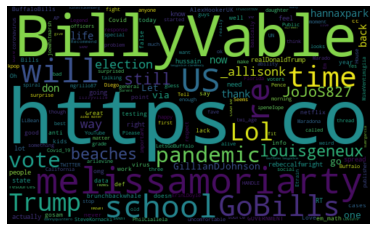

In [ ]:
#word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):


  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df ['Analysis'] = df['Polarity'].apply(getAnalysis)
#show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,🦬🦬🙌🙌 https://t.co/Kam2iHs0j1,0.000,0.000,Neutral
1,Beautiful. #GoBills,1.000,0.850,Positive
2,Let’s go Buffalo!! #GoBills 🦬🦬🦬🦬,0.000,0.000,Neutral
3,I've never felt more passionate about a t-shir...,0.675,0.225,Positive
4,👏👏 https://t.co/h7GvZjkZRB,0.000,0.000,Neutral
...,...,...,...,...
195,If @realDonaldTrump doesn’t expedite testing i...,0.400,-0.200,Negative
196,@katestukenberg @sumrgarcia https://t.co/DWqoA...,0.000,0.000,Neutral
197,.@sumrgarcia's school is closed tomorrow and M...,0.100,-0.100,Negative
198,@dannyquintero good. 😄,0.600,0.700,Positive


In [ ]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if ( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+ ')' +sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1)@BillyVable another social platform that gives the illusion of freedom of speech and privacy-predominately being used by trump supporters crying about election results and conspiracy theories (and fb/tw "censorship")

2)I’m not ready to let go of @SteveKornacki - can we transition him to a coronavirus map? I’m going to need the same energy looking at an uncontrolled pandemic. #lighthouseinastorm

3)Trump’s America. As a patriot, this is devastating to see. #VoteThemOut https://t.co/R0M9XB3hDa

4)Disgusting. https://t.co/0vUH7LbSJr

5)$100 for @melissamoriarty’s grandma. 
Florida is the "tipping point" state, so I donated to ensure we can protect Biden's narrow lead in the battleground state. Who will match me? https://t.co/D2Xr8Ufypq

6)That was rough. 😳 https://t.co/G7YWkhbk9X

7)Atrocious. https://t.co/SW1GW2p2Zq

8)We’re rounding the corner so hard we’re going backwards. 🤦‍♀️🤦‍♀️ #Covid_19 https://t.co/U8ArZ9dRmW

9)@ipeneIope stick with it, you'll thank

In [ ]:
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if ( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+ ')' +sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

1)Beautiful. #GoBills

2)I've never felt more passionate about a t-shirt before. https://t.co/OuLjc1RNYR

3)@_allisonk happy birthday!!! 🎂🎁🎉 https://t.co/08NfhC47WB

4)This is so uncomfortable - I kind of like it? https://t.co/YQbCjmakg3

5)Wow. #Maradona 
Love him or hate him, he was an icon and it’s a great loss for futbol.  #vamos #Argentina

6)@musa one of the greatest shows of all time. cc: @melissamoriarty

7)technology for good 😁 https://t.co/g5i9PRP2eQ

8)@mgrillo87 He’s available and very committed to the product. #rockygarcia https://t.co/x0AAO8iIv8

9)@BillyVable I meeeeeaaaannn I know my social platformzzzz

10)Winning weekend. https://t.co/YCZchMJLdB

11)@ebroms @SteveKornacki I for sure need his skin care routine. Incredible.

12)Please. Tell me more about how “your vote doesn’t matter”. 😳

13)@hannaxpark msnbc cut him after his first lie.

14)@BillyVable Fox and AP called Arizona on Election Day, Trump camp threw a fit so it was rolled back and

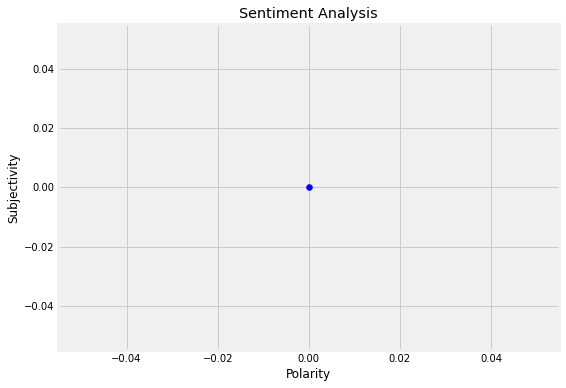

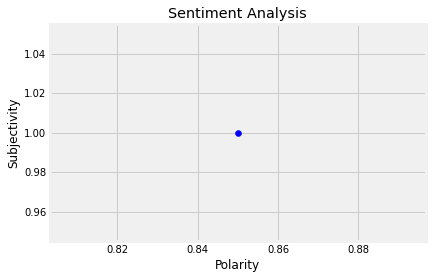

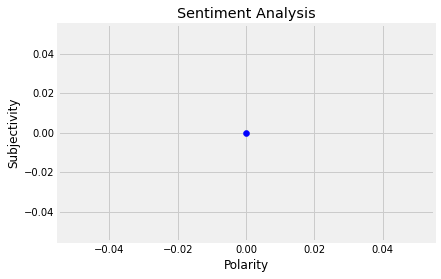

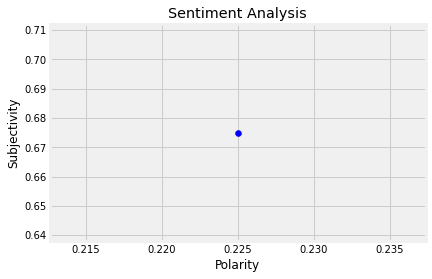

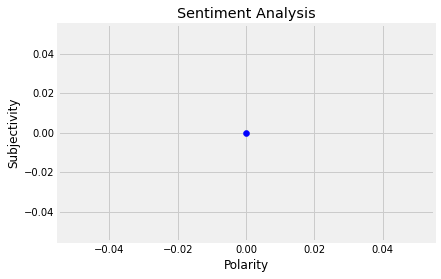

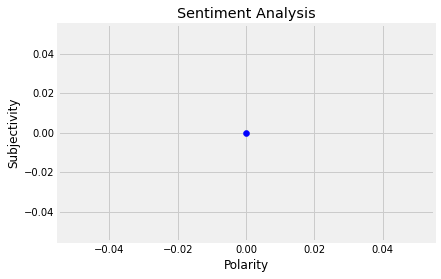

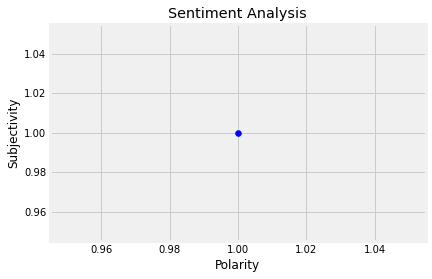

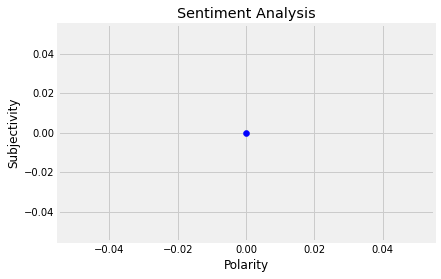

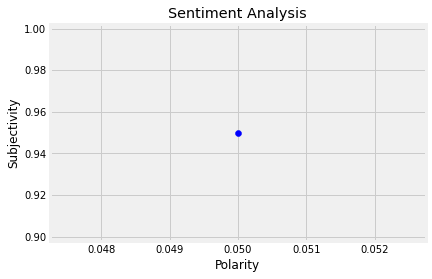

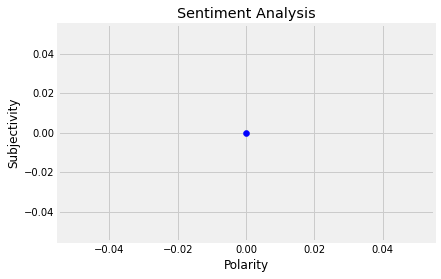

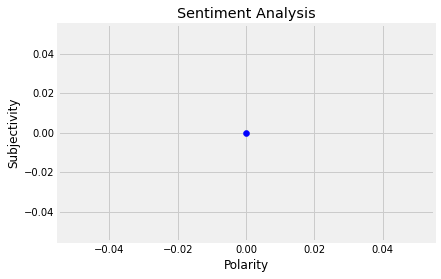

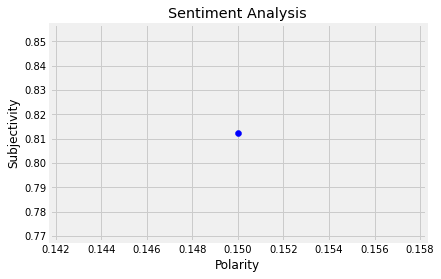

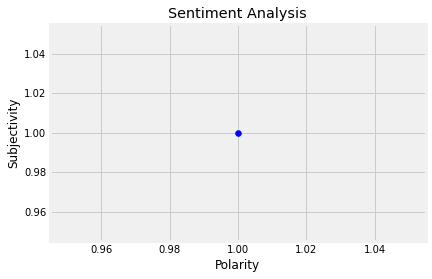

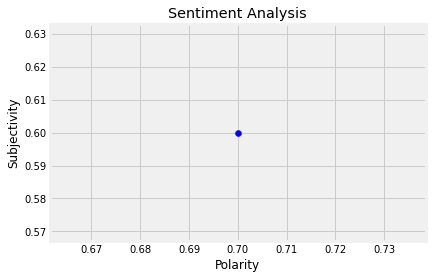

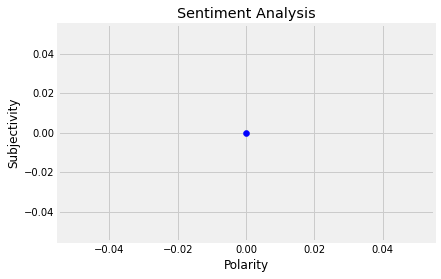

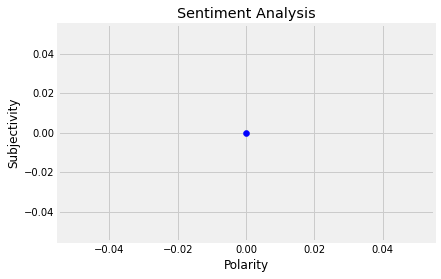

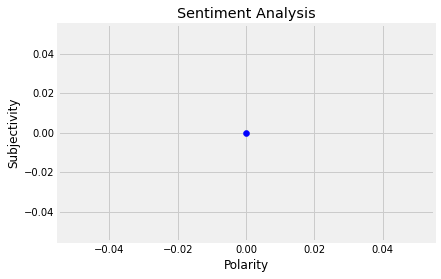

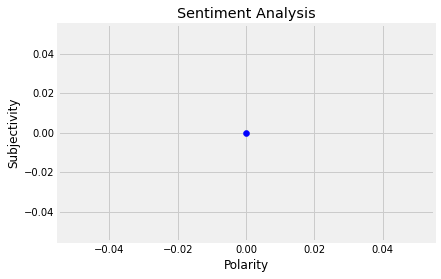

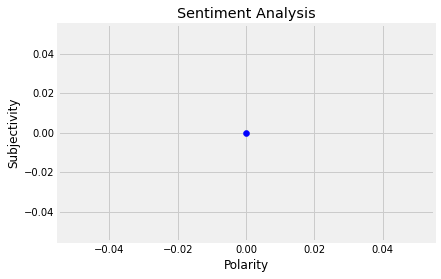

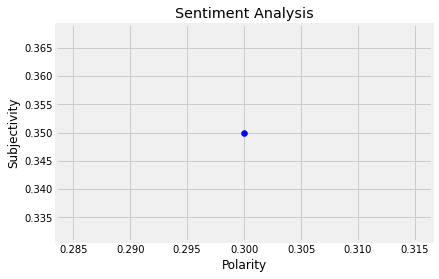

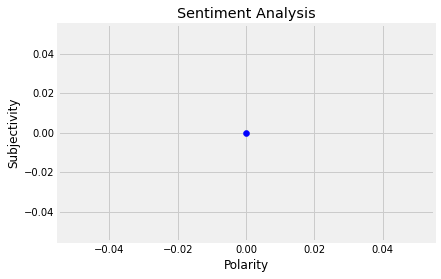

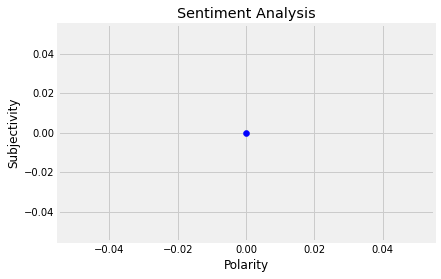

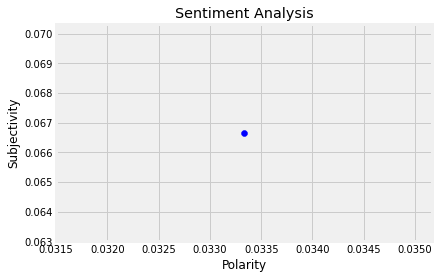

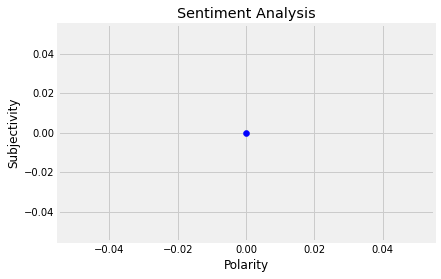

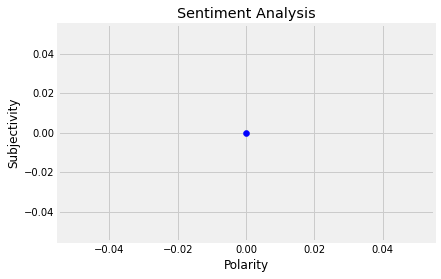

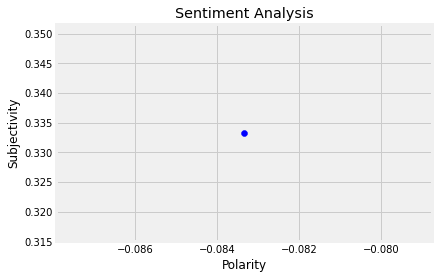

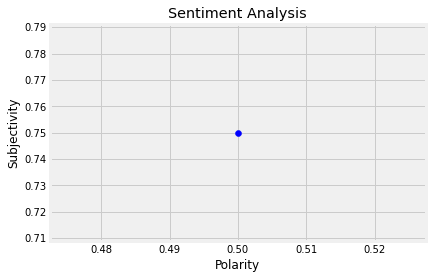

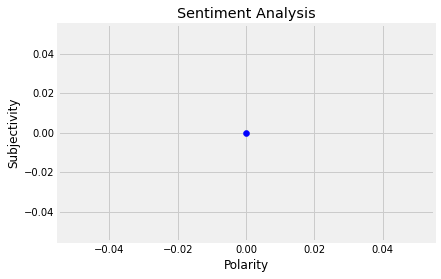

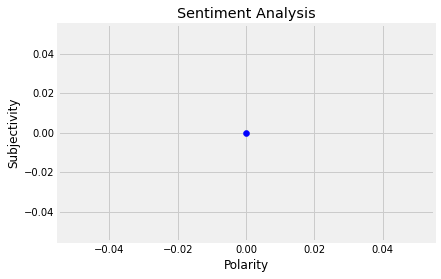

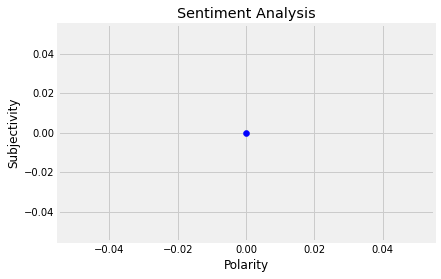

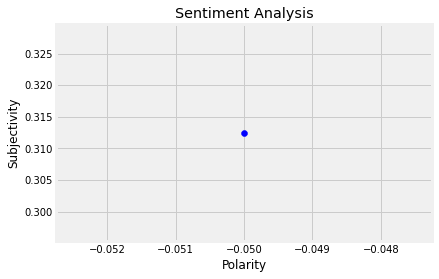

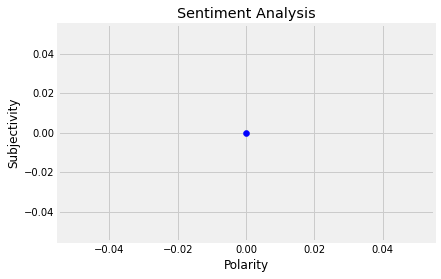

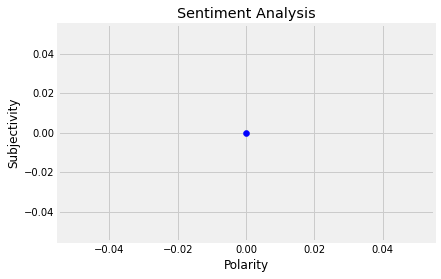

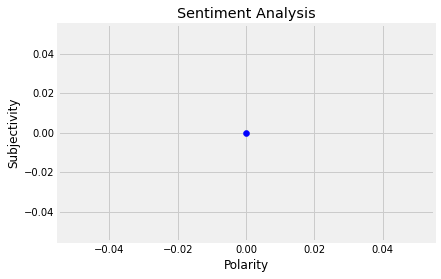

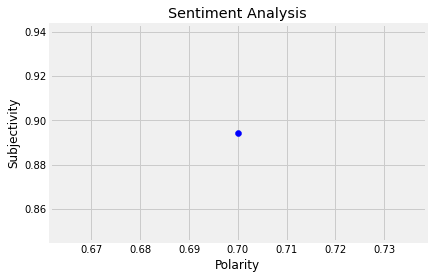

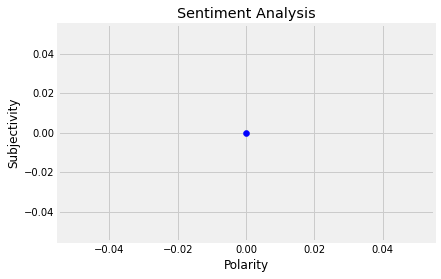

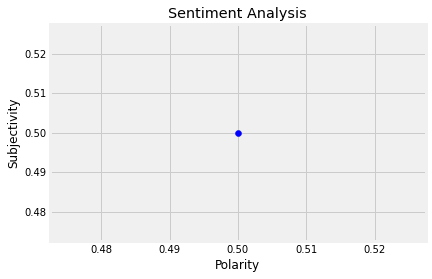

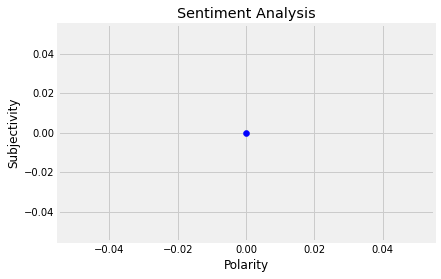

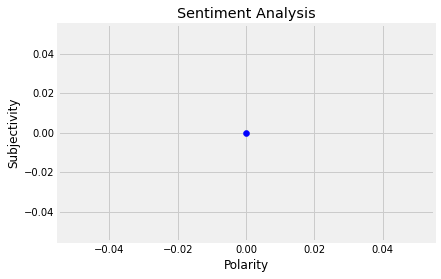

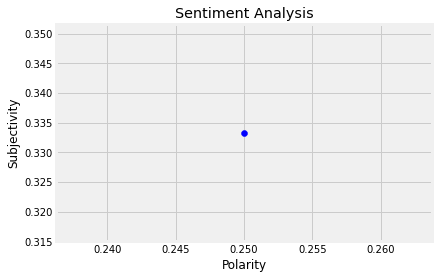

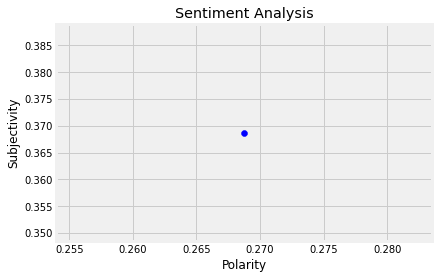

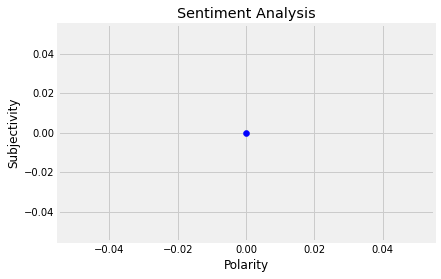

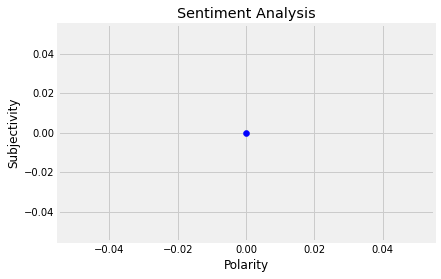

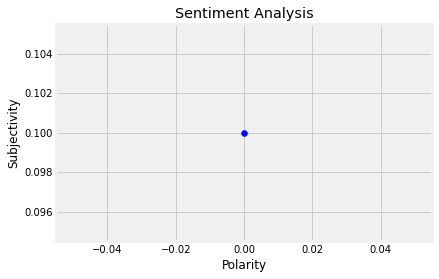

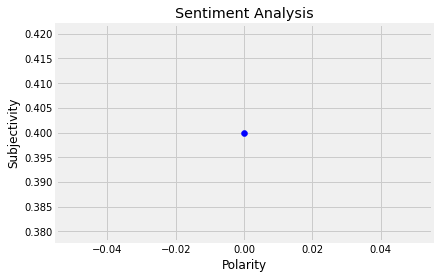

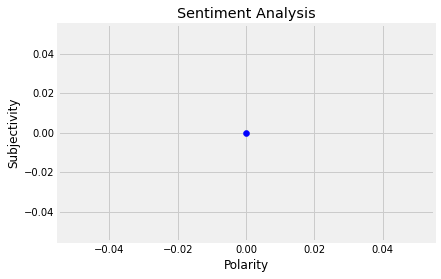

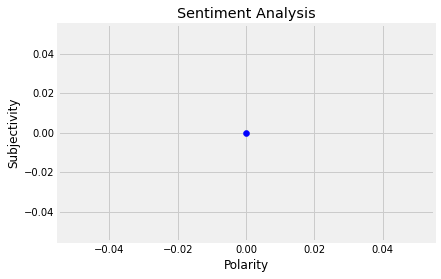

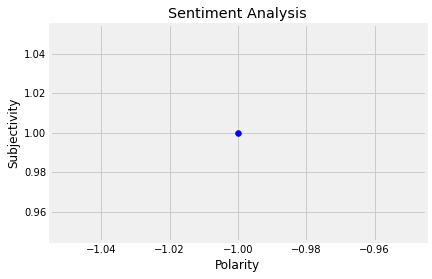

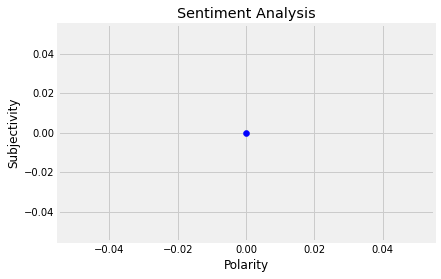

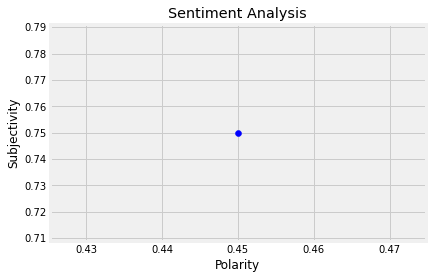

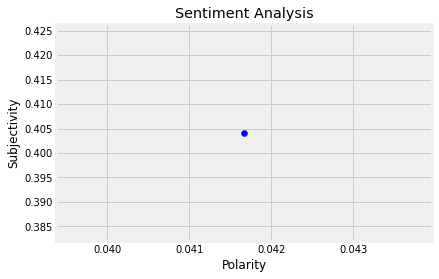

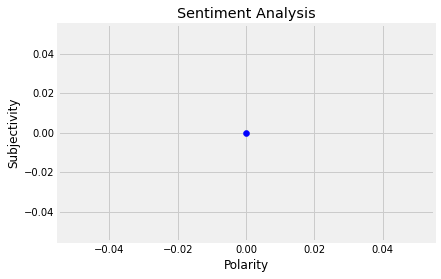

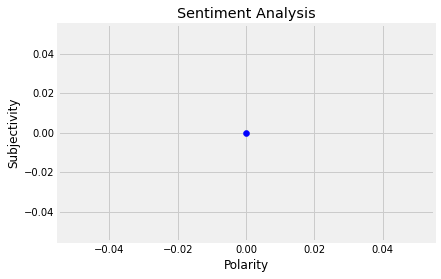

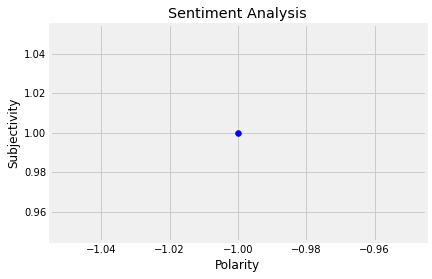

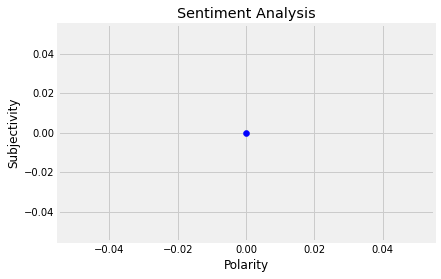

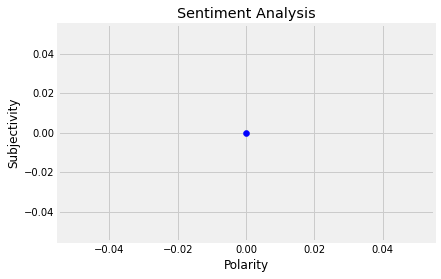

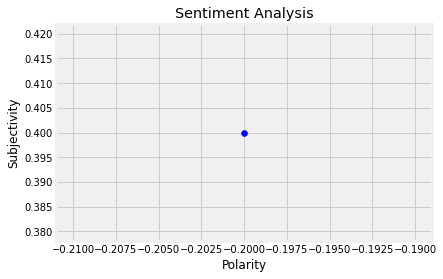

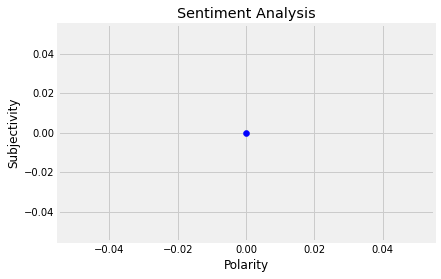

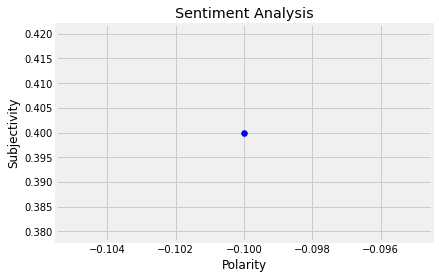

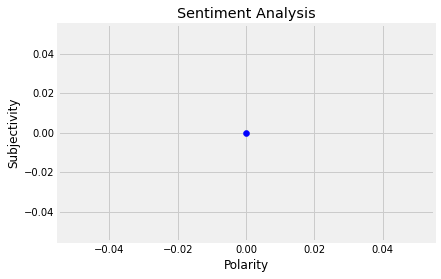

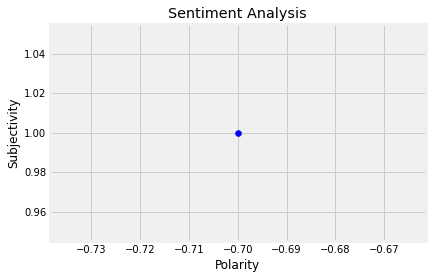

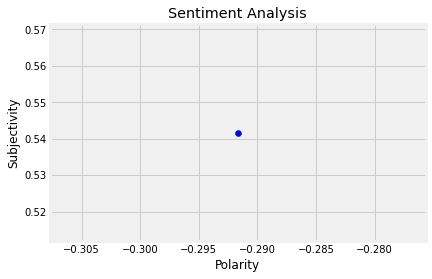

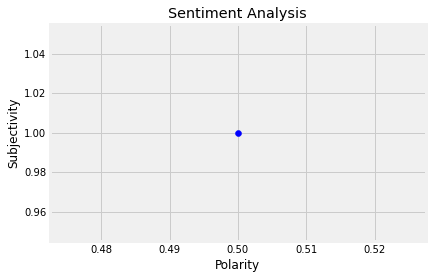

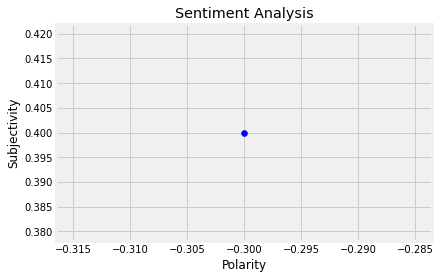

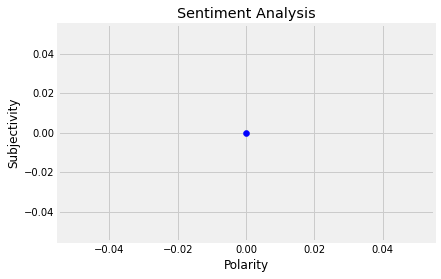

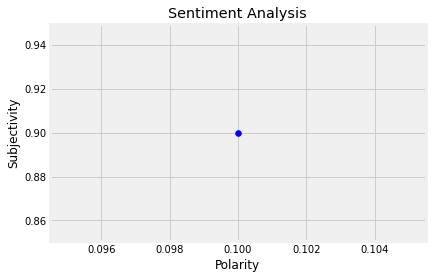

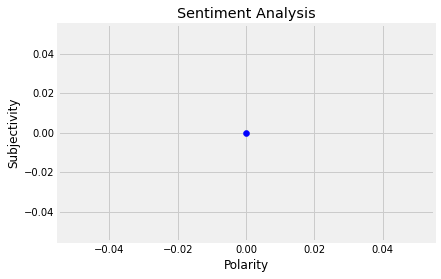

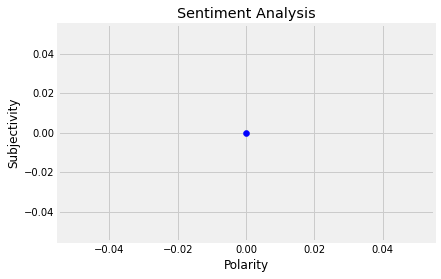

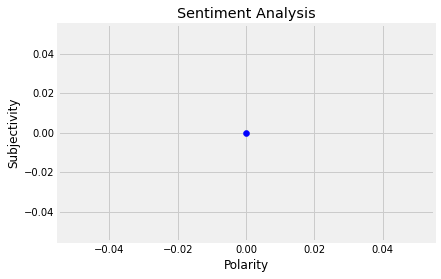

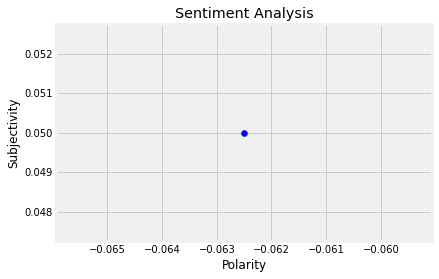

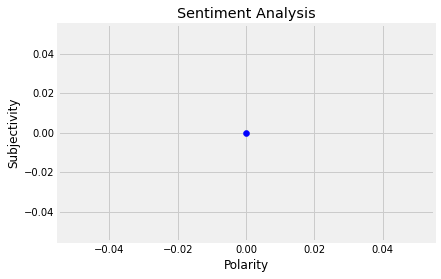

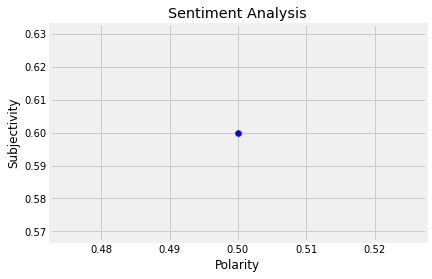

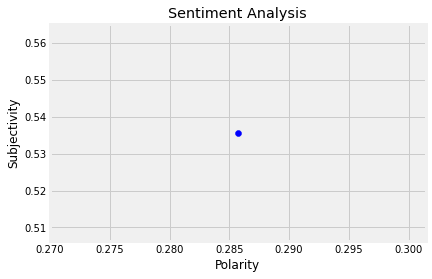

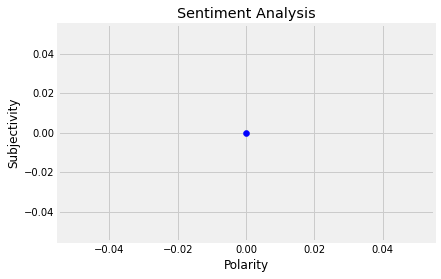

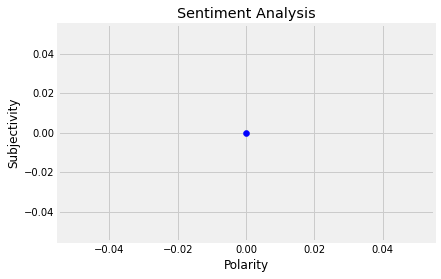

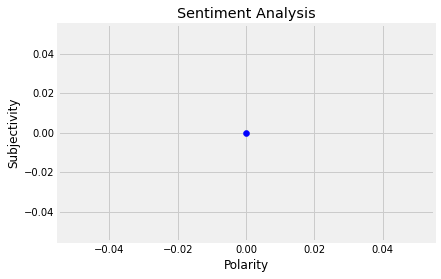

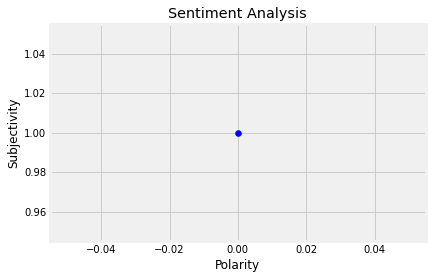

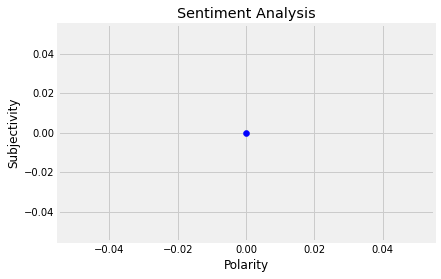

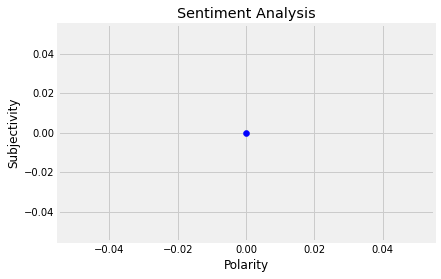

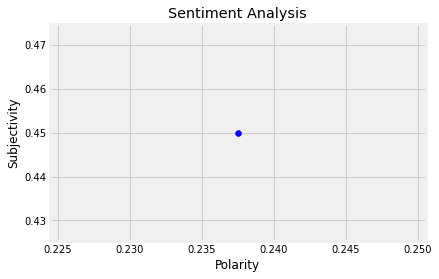

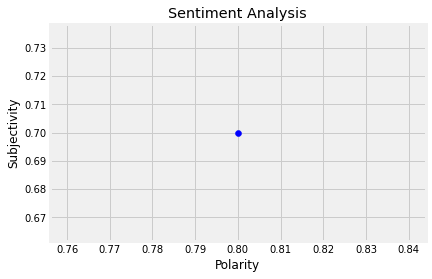

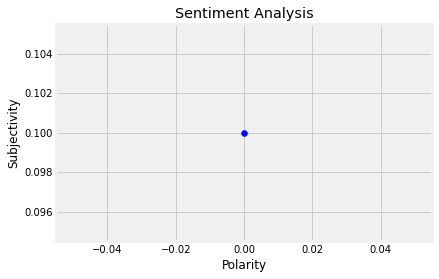

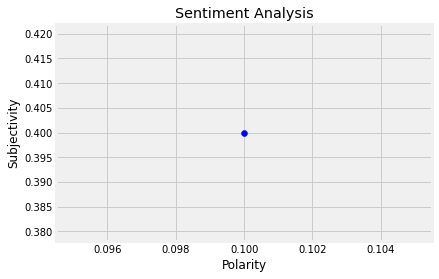

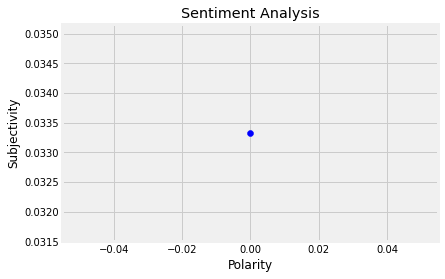

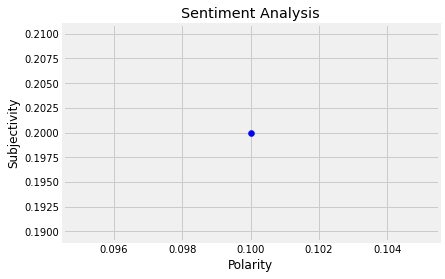

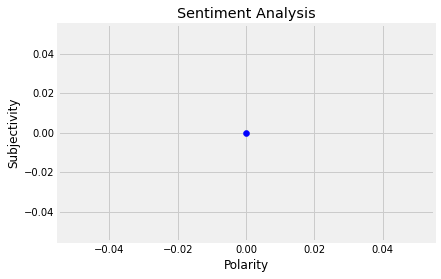

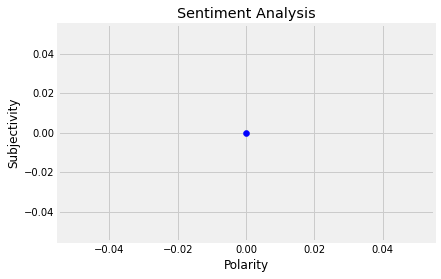

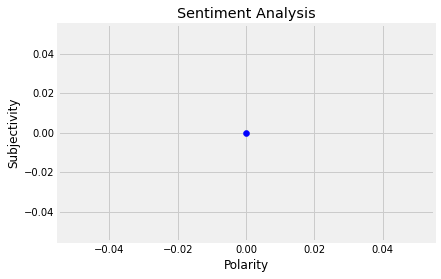

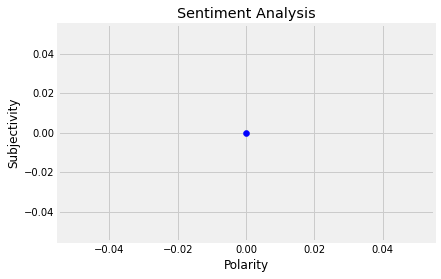

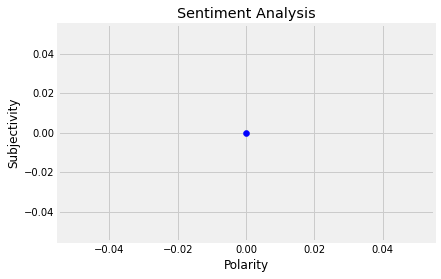

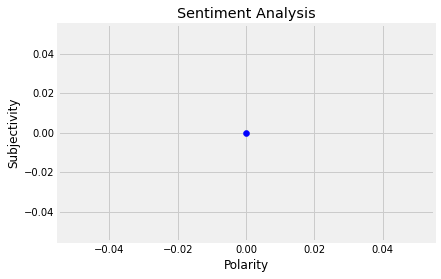

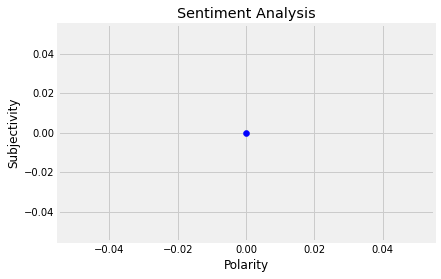

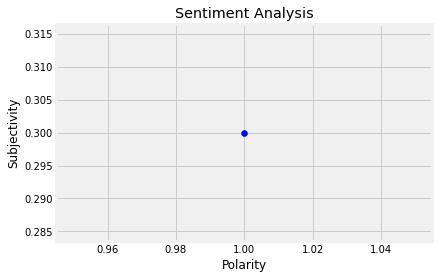

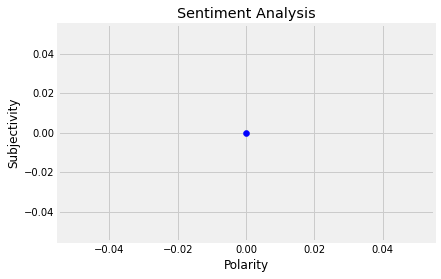

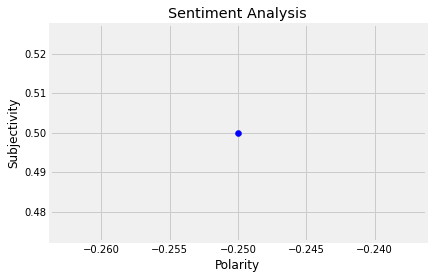

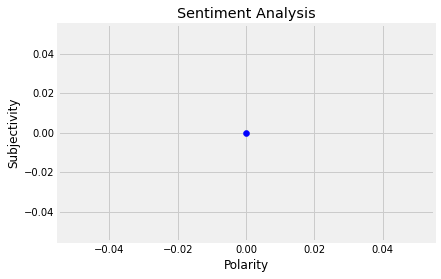

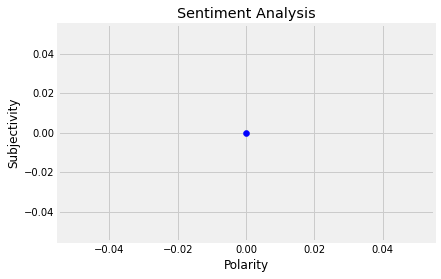

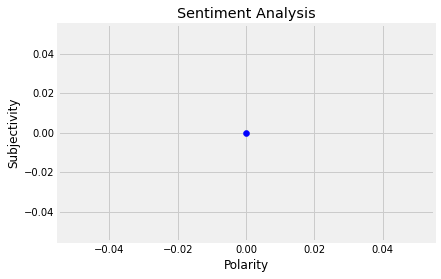

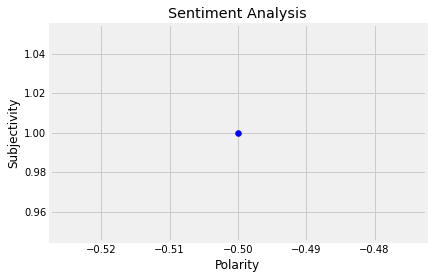

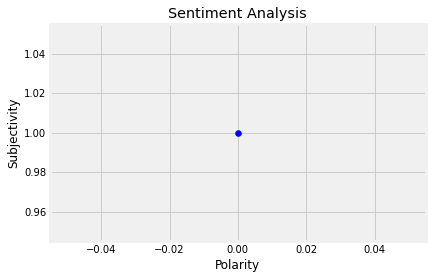

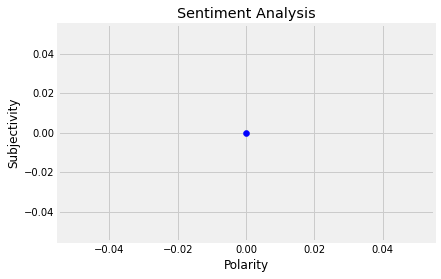

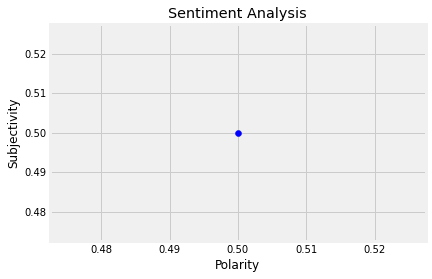

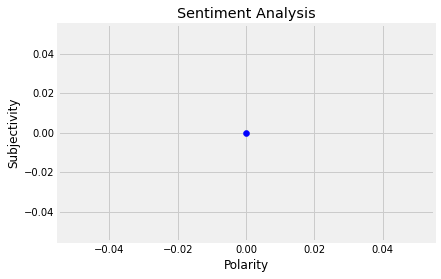

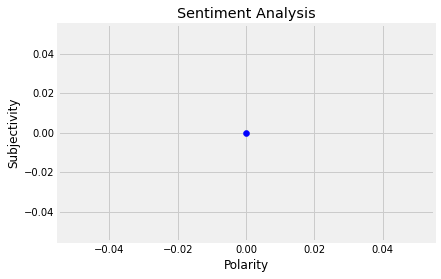

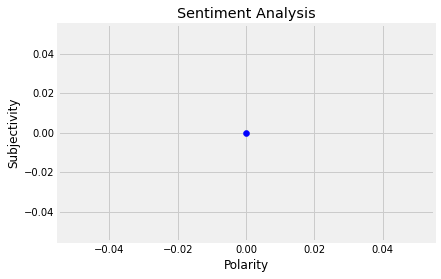

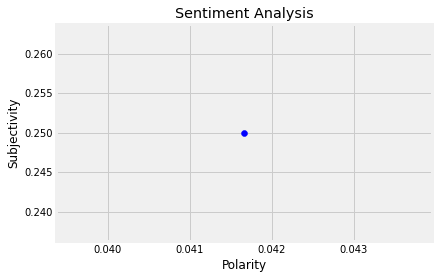

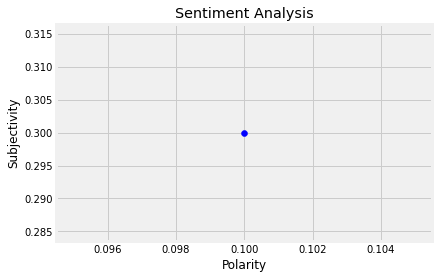

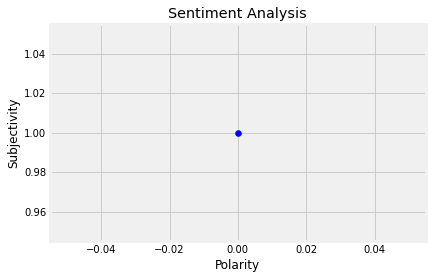

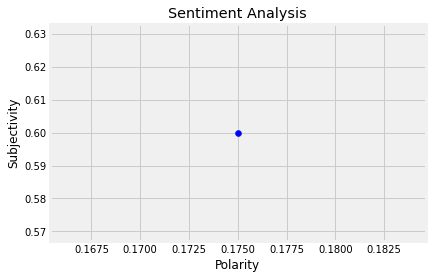

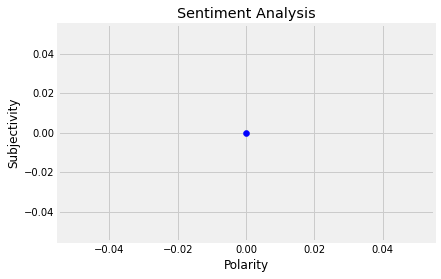

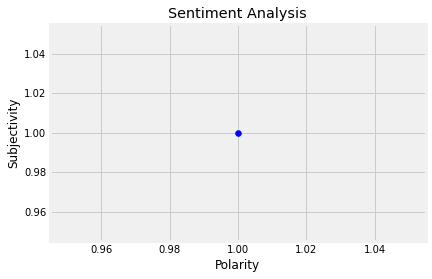

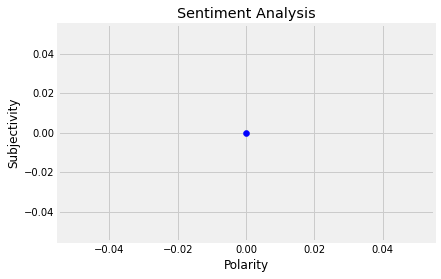

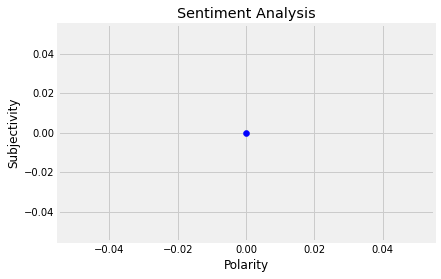

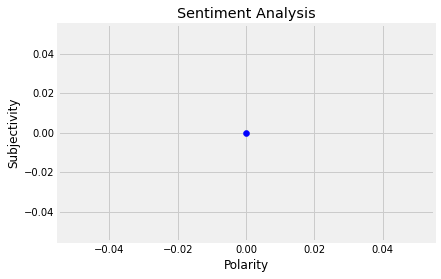

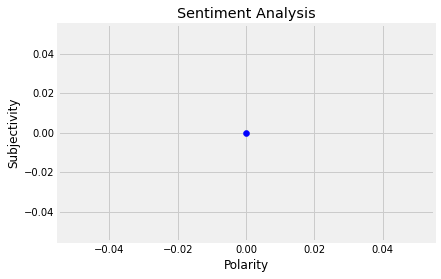

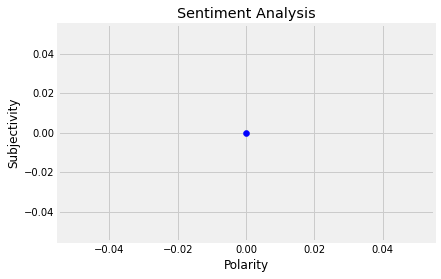

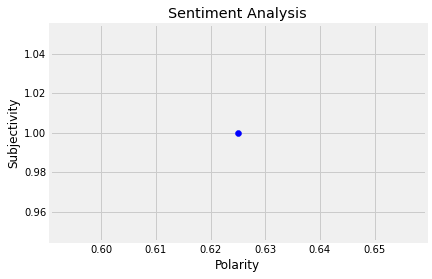

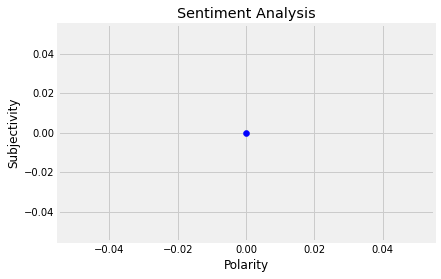

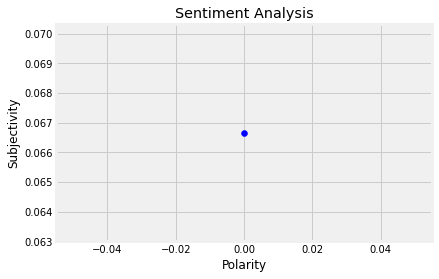

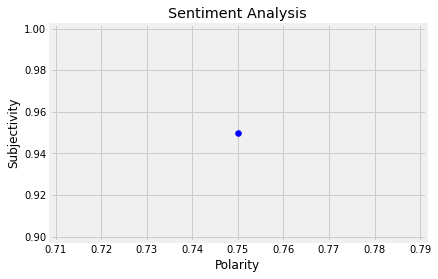

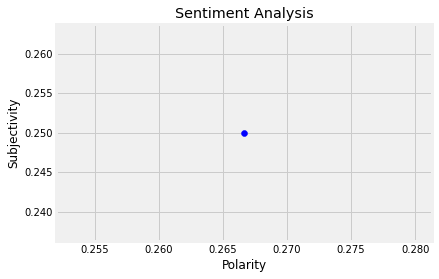

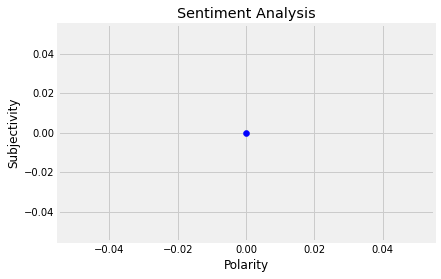

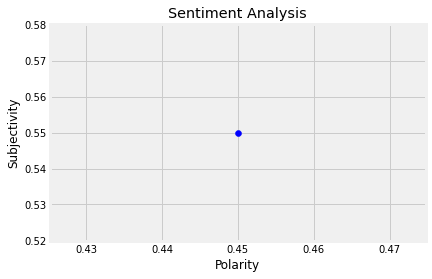

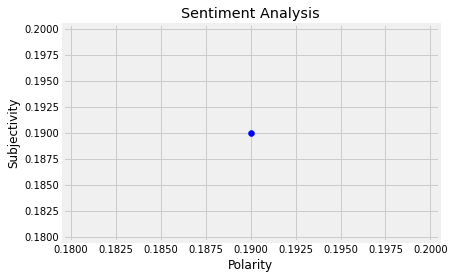

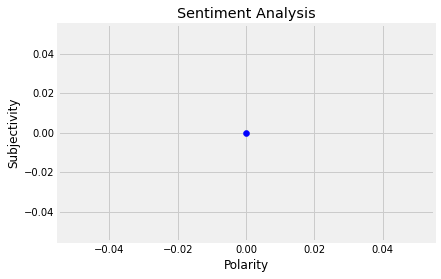

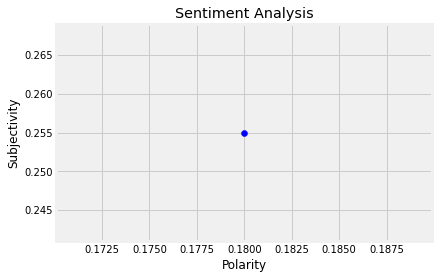

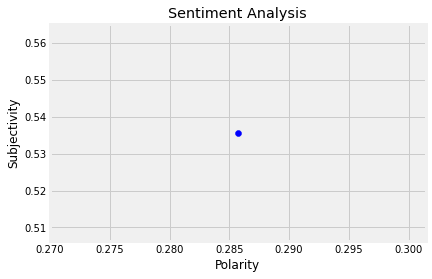

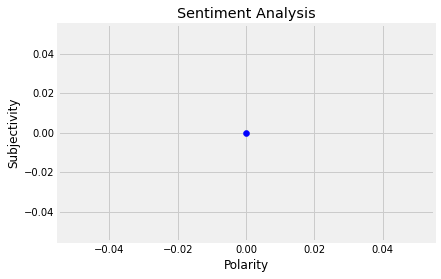

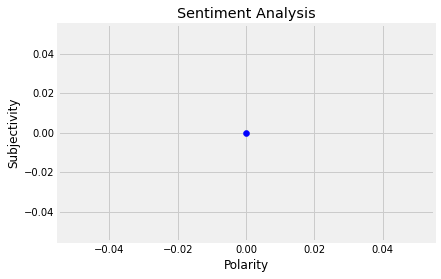

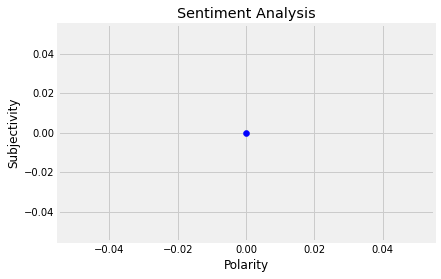

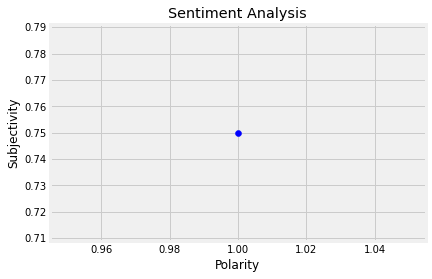

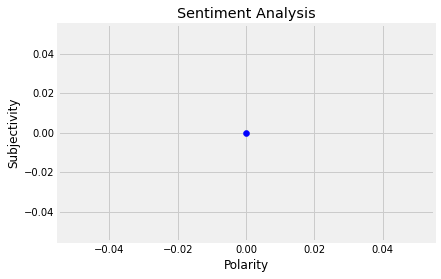

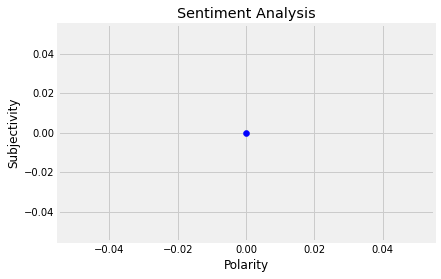

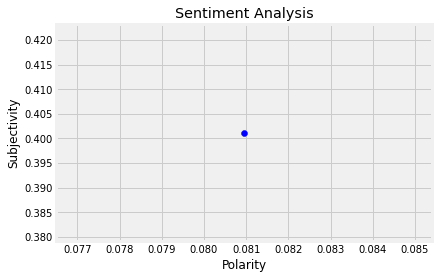

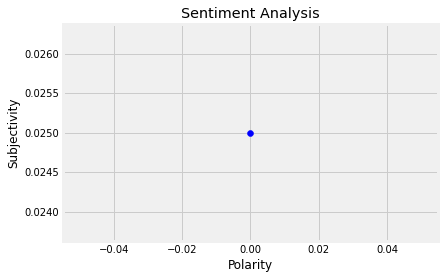

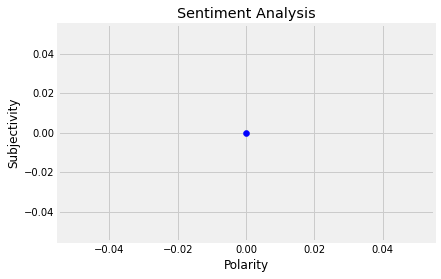

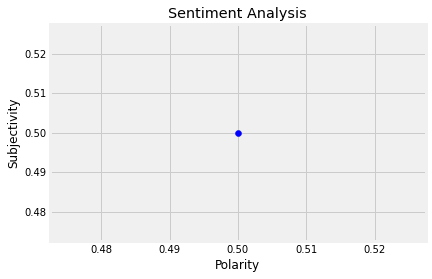

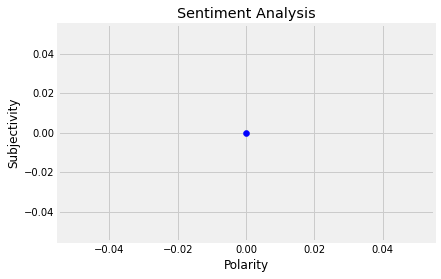

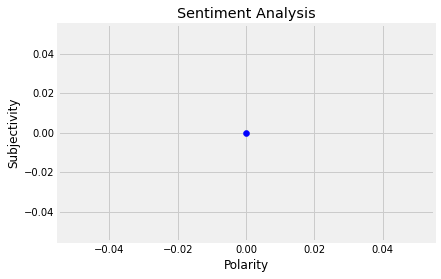

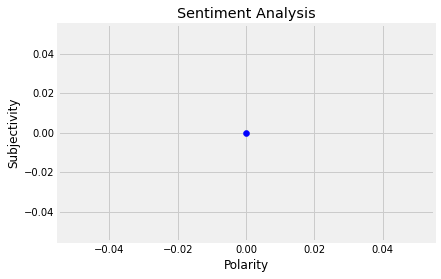

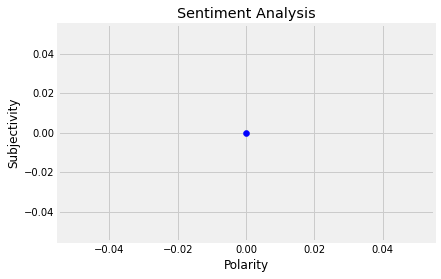

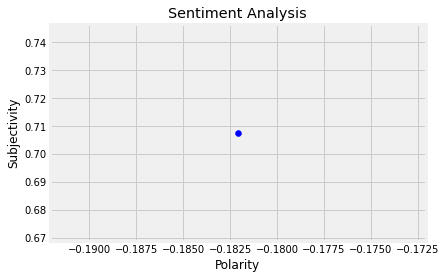

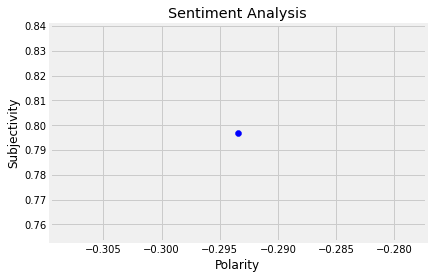

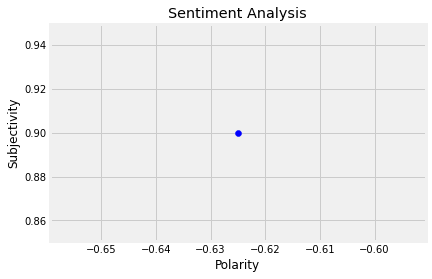

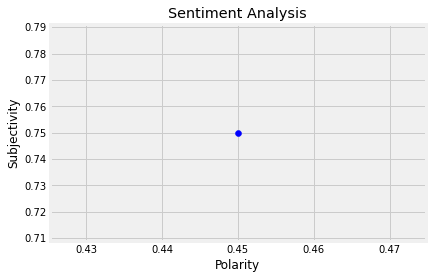

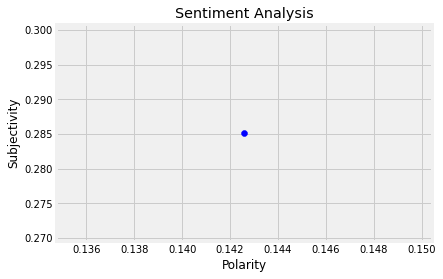

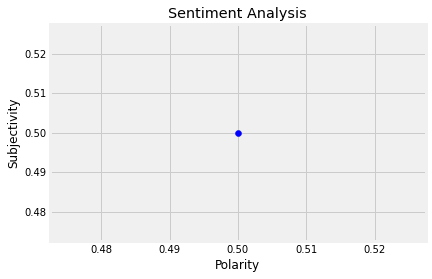

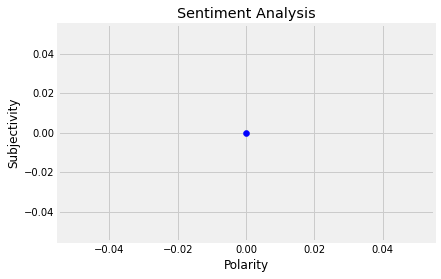

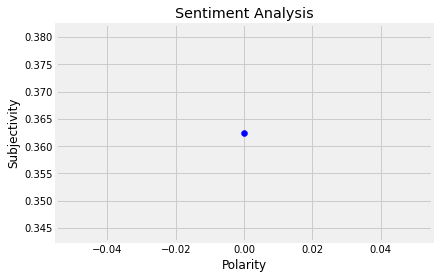

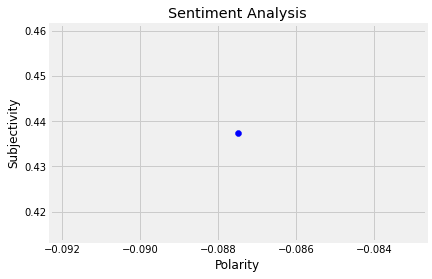

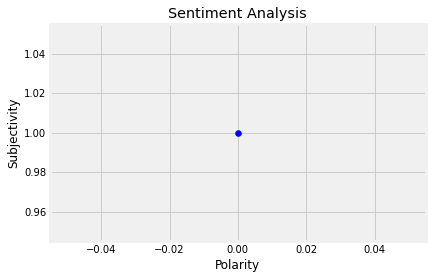

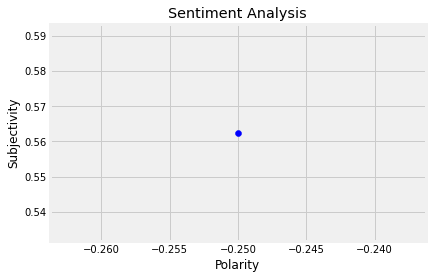

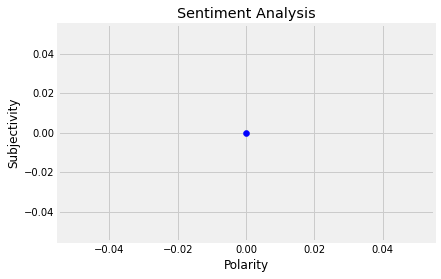

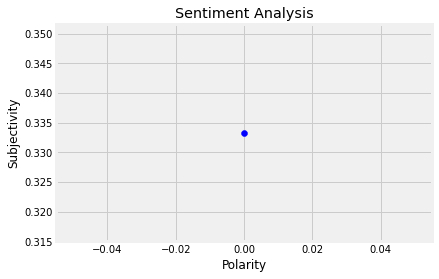

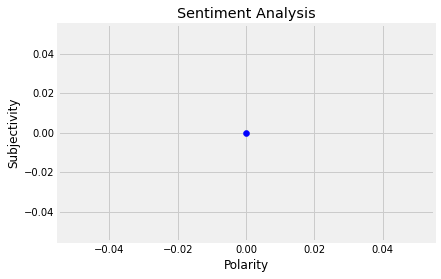

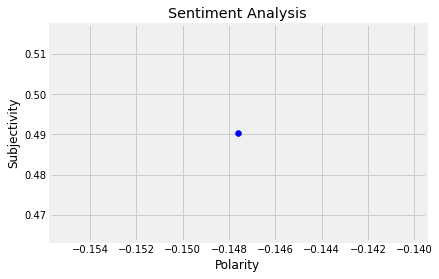

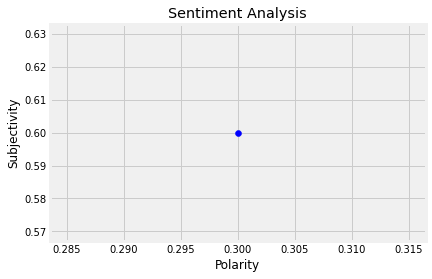

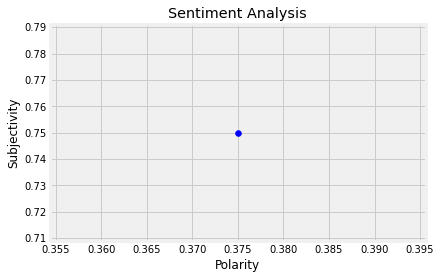

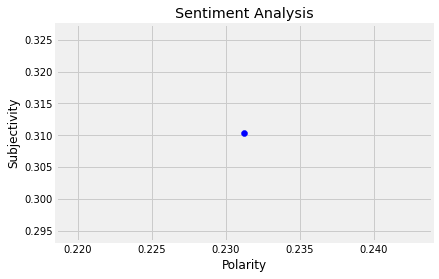

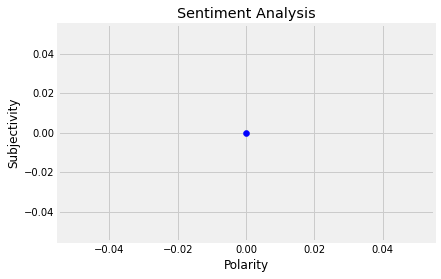

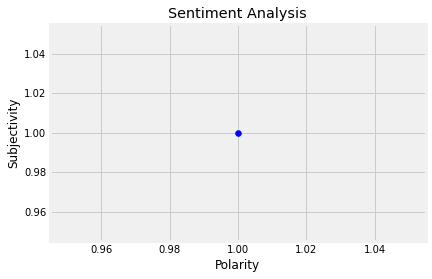

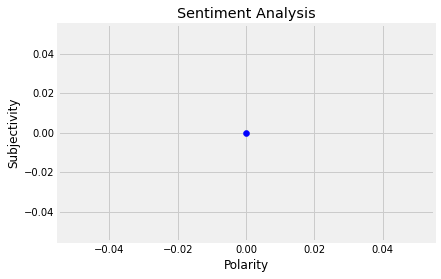

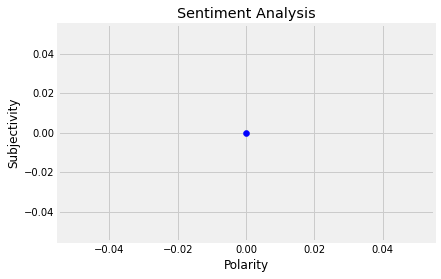

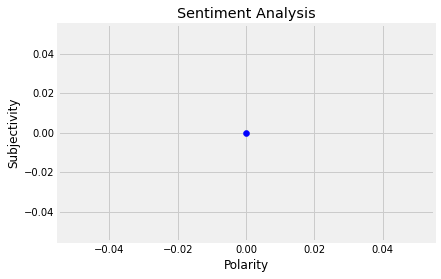

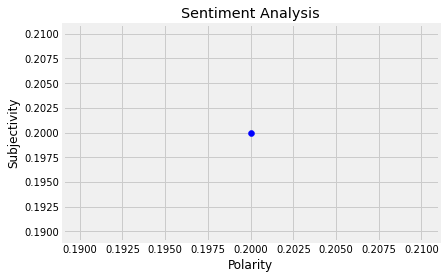

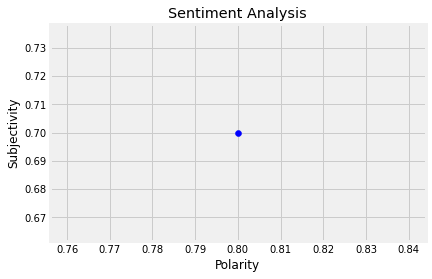

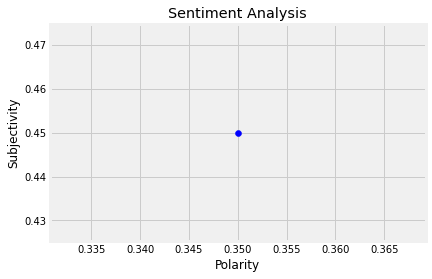

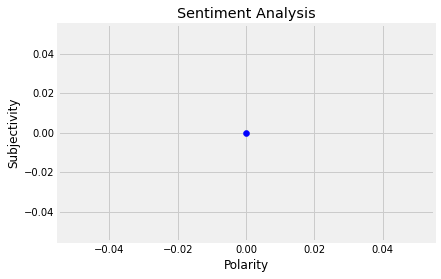

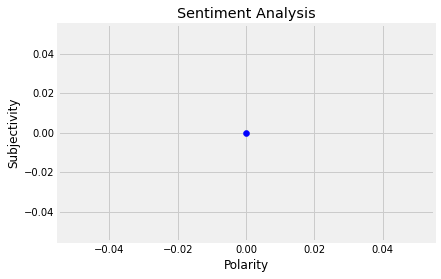

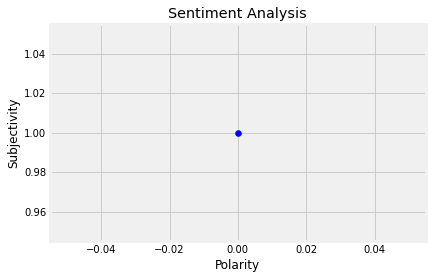

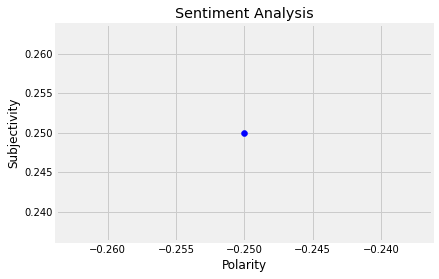

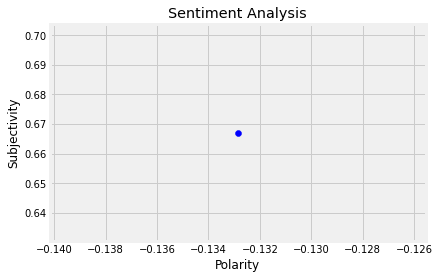

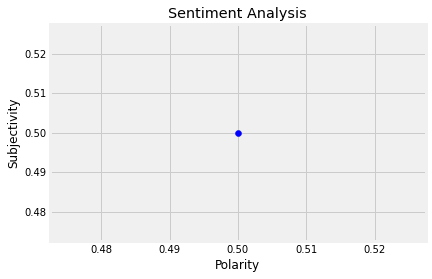

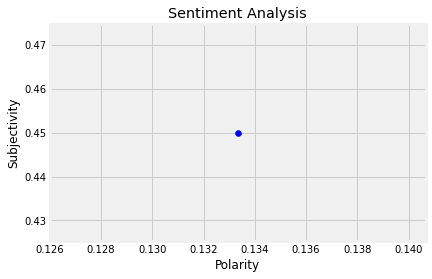

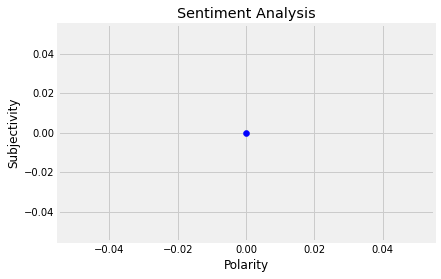

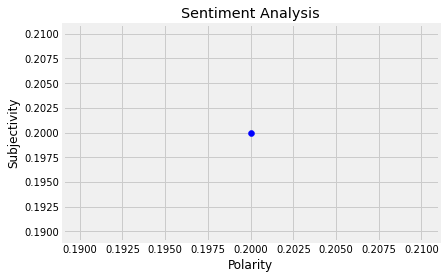

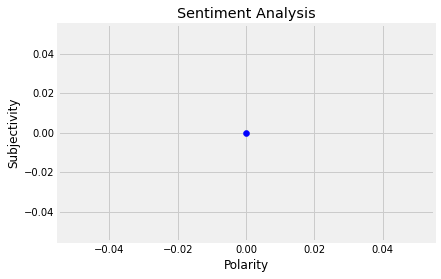

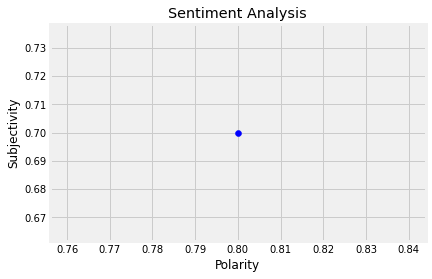

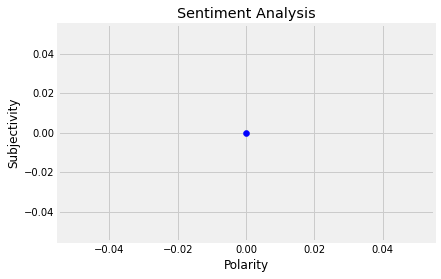

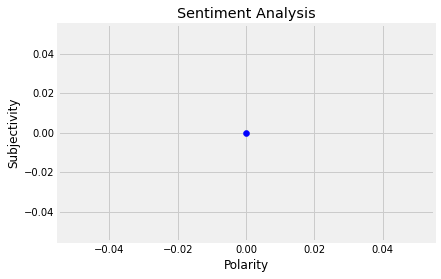

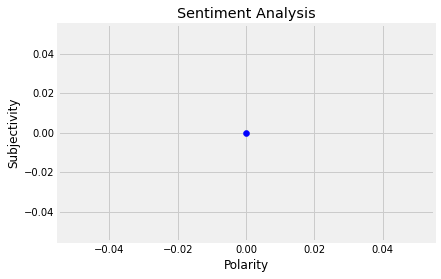

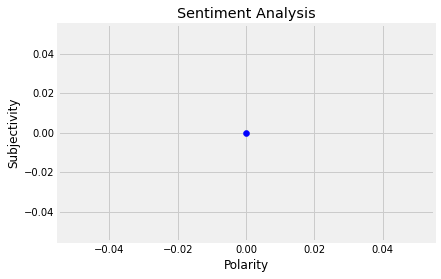

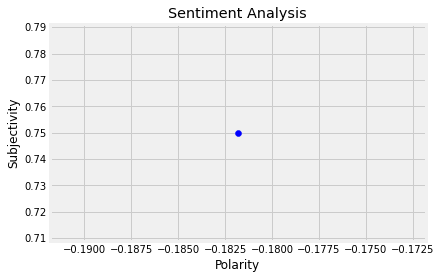

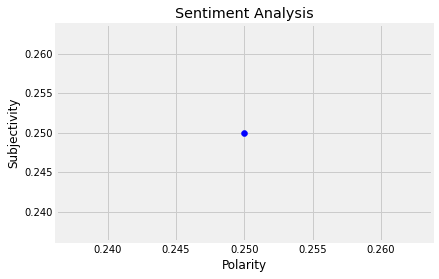

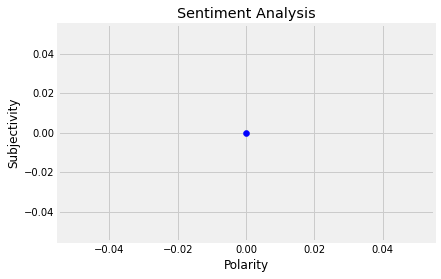

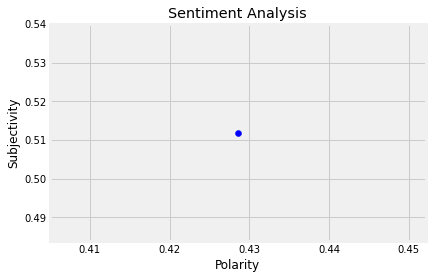

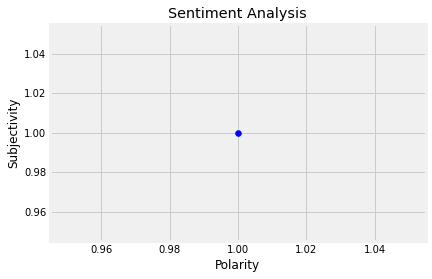

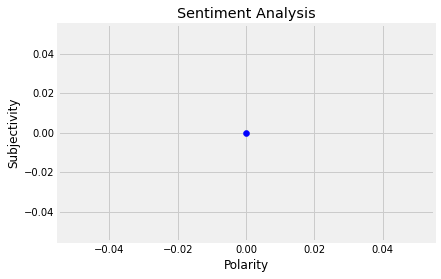

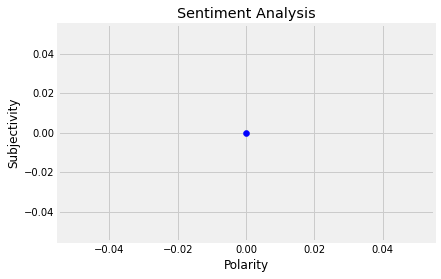

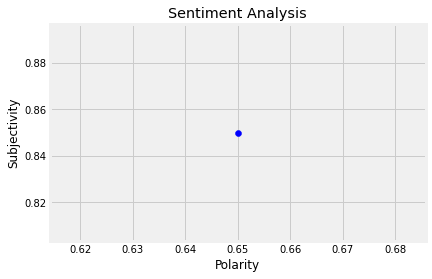

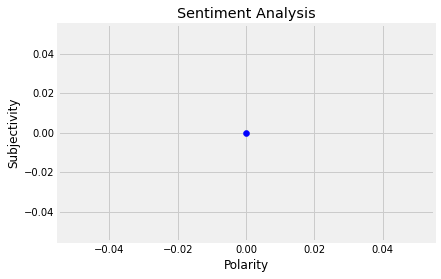

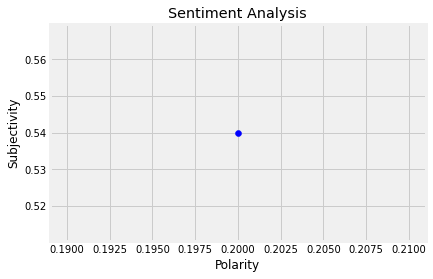

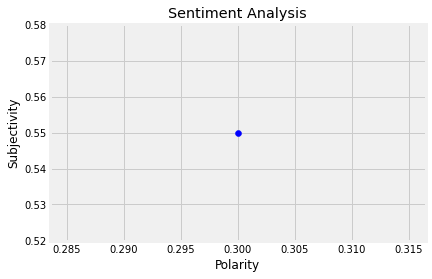

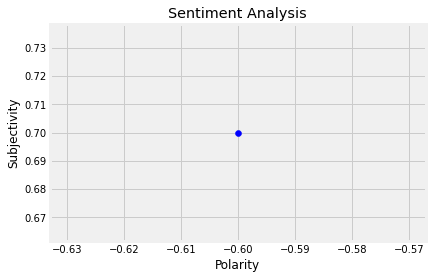

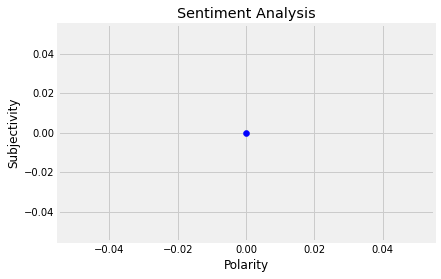

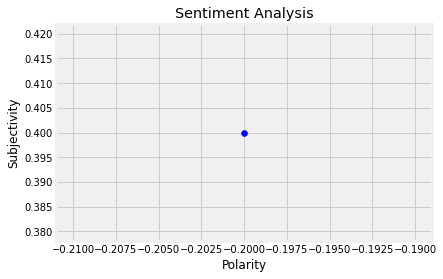

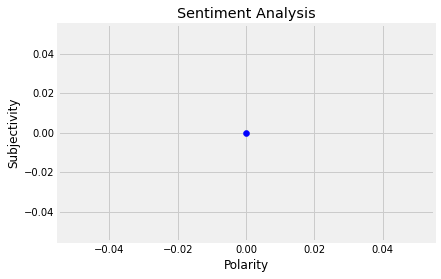

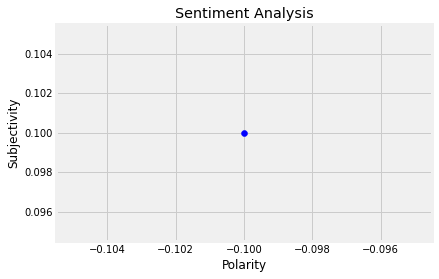

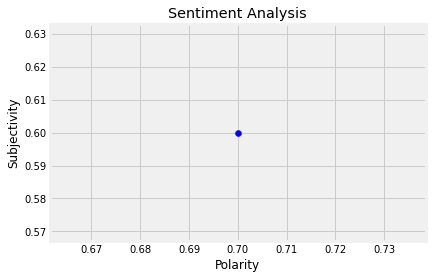

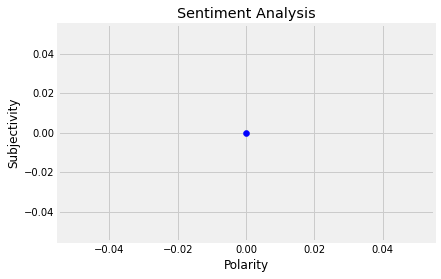

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, sortedDF.shape[0] ):
  plt.scatter(df["Polarity"][i],df["Subjectivity"][i],color='Blue')
  #plt.scatter(x,y,color)
  plt.title('Sentiment Analysis')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
  plt.show()

In [ ]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

30.5

In [ ]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100 , 1)

12.0

In [ ]:
#show the value counts
df['Analysis'].value_counts()

Neutral     115
Positive     61
Negative     24
Name: Analysis, dtype: int64

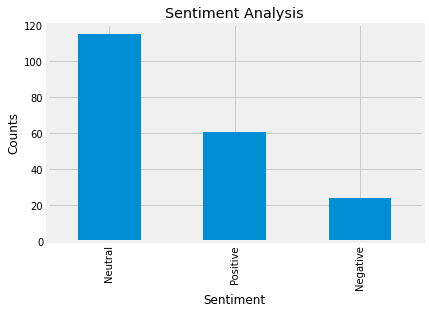

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

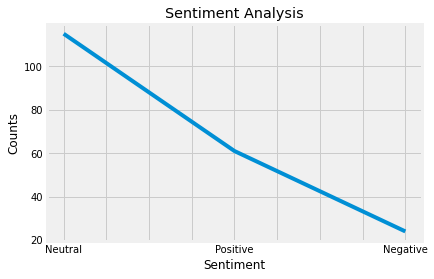

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()